# Target Scaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
x = np.random.uniform(low=5, high=20, size=100)
e = np.random.normal(loc=0, scale=0.5, size=100)

y = (x + e) ** 3

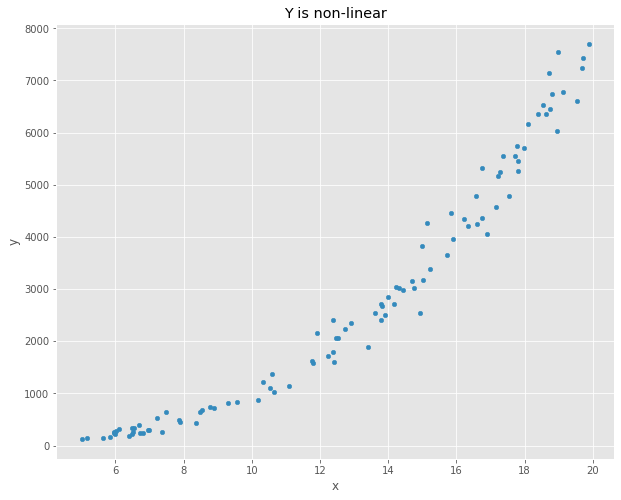

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))

pd.DataFrame({'x': x, 'y': y}).plot(
    title='Y is non-linear',
    kind='scatter',
    x='x', y='y', 
    ax=ax
)

fig.show()